In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Hyper parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
#tutorial data loading
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import math
import pickle

class ChestXRayDataset(Dataset):

    def __init__(self,train):
        # df = pd.read_csv('./data/chest_xray_train.csv')
        
        #Load Static testing and training data indices
        
        with open('static_data/train.pickle','rb') as handle:
            train_indices = pickle.load(handle)
        
        with open('static_data/test.pickle','rb') as handle:
            test_indices = pickle.load(handle)

        df = pd.read_csv('data/chest_xray_train.csv')

        df = df.drop(columns = ["file_name"]) # unnecessary column

        columns_len = len(df.columns) # Get number of columns in dataframe
        print(columns_len)
        
        # We have to get the first image in order to initalize array
        first_img = df.iloc[0,0:columns_len-1].to_numpy()
        first_img = np.resize(first_img,(64,64))
        
        # Get first class to initalize array
        second = df.loc[0,"class_id"]
        
        df_X = np.array([first_img],dtype=np.float32) # Image Tensor
        
        df_y = np.array([second],dtype=np.float32) # Class Array
        
        for row in range(1,len(df)):
            
            flattened_img = df.iloc[row,0:columns_len-1].to_numpy() # skip class_id
            class_id = df.loc[row,"class_id"] # get class_id
            matrix_img = np.resize(flattened_img,(64,64)) # turn flattened image back into 2d image

            # df_X = df_X.astype(np.float32)
            # df_y = df_y.astype(np.float32)
        
            df_X = np.append(df_X, [matrix_img],axis = 0) # append image
            df_y = np.append(df_y, class_id) # append class

        if train == True:
            # df_X, df_y = df_X[train_indices], df_y[train_indices] #X_train, y_train
            df_X, df_y = df_X[train_indices], df_X[test_indices]
            # df_y = torch.from_numpy(df_y)
        else:
            # df_X, df_y = df_X[test_indices], df_y[test_indices] #y_train, y_test
            df_X, df_y = df_y[train_indices], df_y[test_indices] #y_train, y_test
            # df_y = torch.from_numpy(df_y)
            
        X_torch = torch.from_numpy(df_X)
        # y_torch = torch.from_numpy(df_y)

        self.X = X_torch
        # self.y = y_torch
        self.y = df_y

    def __getitem__(self,index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.y.shape[0]

In [5]:
train_dataset = ChestXRayDataset(True)
validation_dataset = ChestXRayDataset(False)

4097
4097


In [9]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size = batch_size)

In [10]:
classes = (0,1,2)

In [11]:
class ConvNet(nn.Module):
    def __init__(self):
        pass
        
    def forward(self,x):
        pass

In [14]:
model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
n_total_steps = len(train_loader)

AttributeError: 'ConvNet' object has no attribute '_modules'

In [15]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

NameError: name 'model' is not defined

Files already downloaded and verified
Files already downloaded and verified


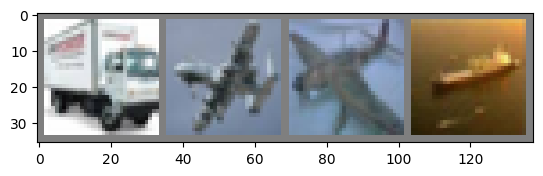

Epoch [1/5], Step [2000/12500], Loss: 2.3133
Epoch [1/5], Step [4000/12500], Loss: 2.3026
Epoch [1/5], Step [6000/12500], Loss: 2.2756
Epoch [1/5], Step [8000/12500], Loss: 2.2303
Epoch [1/5], Step [10000/12500], Loss: 2.3690
Epoch [1/5], Step [12000/12500], Loss: 2.1108
Epoch [2/5], Step [2000/12500], Loss: 2.1159
Epoch [2/5], Step [4000/12500], Loss: 2.0568
Epoch [2/5], Step [6000/12500], Loss: 1.9809
Epoch [2/5], Step [8000/12500], Loss: 1.8931
Epoch [2/5], Step [10000/12500], Loss: 1.5951
Epoch [2/5], Step [12000/12500], Loss: 1.8156
Epoch [3/5], Step [2000/12500], Loss: 1.6594
Epoch [3/5], Step [4000/12500], Loss: 1.5642
Epoch [3/5], Step [6000/12500], Loss: 2.0569
Epoch [3/5], Step [8000/12500], Loss: 1.6733
Epoch [3/5], Step [10000/12500], Loss: 1.2532
Epoch [3/5], Step [12000/12500], Loss: 2.0487
Epoch [4/5], Step [2000/12500], Loss: 2.1321
Epoch [4/5], Step [4000/12500], Loss: 2.3567
Epoch [4/5], Step [6000/12500], Loss: 1.8798
Epoch [4/5], Step [8000/12500], Loss: 1.1026
Epoc

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


In [20]:
#################
train_dataset = ChestXRayDataset(True)
validation_dataset = ChestXRayDataset(False)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size = batch_size)

classes = (0,1,2)
train_dataset.X = train_dataset.X.float()
#################

4097
4097


In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# # CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
# train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                         download=True, transform=transform)

# test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)

# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
#                                           shuffle=True)

# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
#                                          shuffle=False)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# def imshow(img):
#     img = img / 2 + 0.5  # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()




# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
# imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, 1)
        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 84)
        self.fc3 = nn.Linear(84, 3)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 32 * 32)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        images = torch.reshape(images,(4,1,64,64))
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x16384 and 8192x128)